In [120]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [121]:
#loading dataset
df=pd.read_csv('Country-data.csv')

In [122]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [123]:
df.shape

(167, 10)

In [124]:
#checking null values
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [125]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [126]:
df1=df.copy()
#Encoding country
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df1['country_en']=le.fit_transform(df1['country'])

In [127]:
df1=df1.drop(['country'],axis=1)

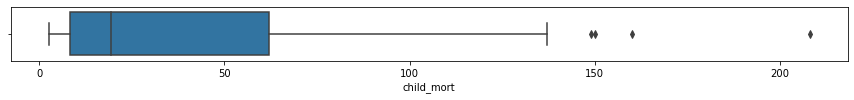

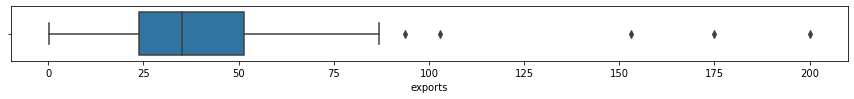

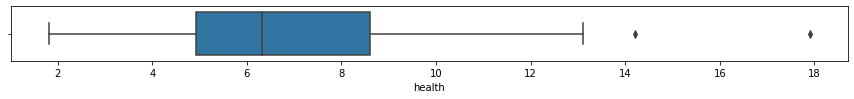

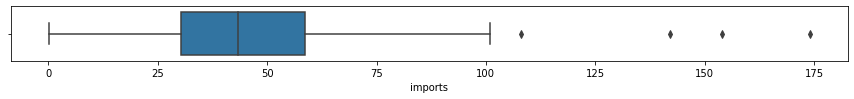

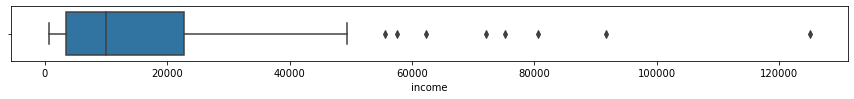

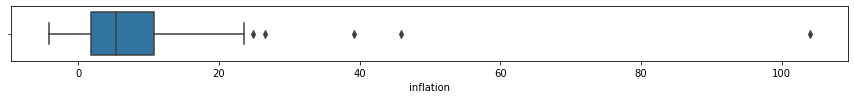

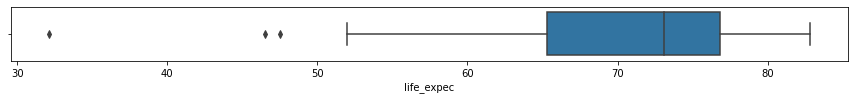

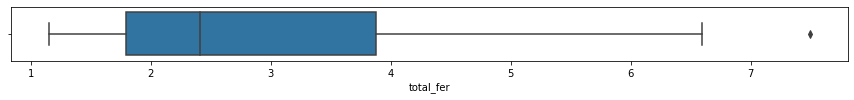

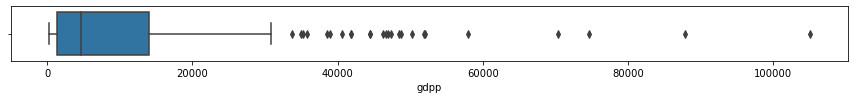

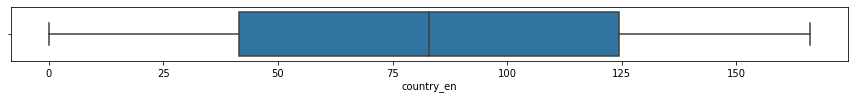

In [128]:
#Checking for Outliers
for column in df1:
        plt.figure(figsize=(15,1))
        sns.boxplot(data=df1, x=column)

In [129]:
#Removing outliers
for column in df1:
        Q1=np.percentile(df1[column],25,interpolation='midpoint')
        Q2=np.percentile(df1[column],50,interpolation='midpoint')
        Q3=np.percentile(df1[column],75,interpolation='midpoint')
        IQR=Q3-Q1
        #lower and Upper limit
        low_lim=Q1-1.5*IQR
        up_lim=Q3+1.5*IQR
        outlier=[]
        for x in df1[column]:
            if((x>up_lim)or(x<low_lim)):
                outlier.append(x)
        ind=(df1[column]<=low_lim)
        ind1=(df1[column]>=up_lim)
        ind_new=df1.loc[ind].index
        ind_new1=df1.loc[ind1].index
        for i in ind_new:
            df1.drop([i],inplace=True)
        for i in ind_new1:
            df1.drop([i],inplace=True)

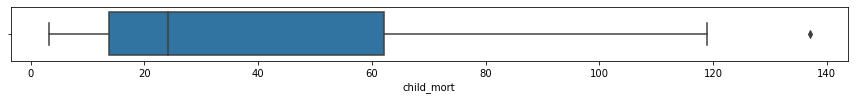

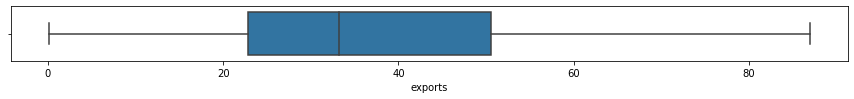

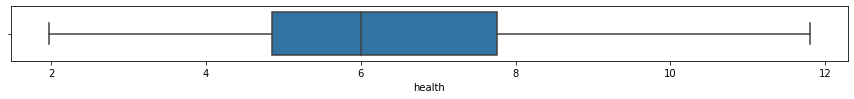

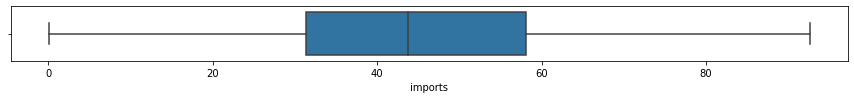

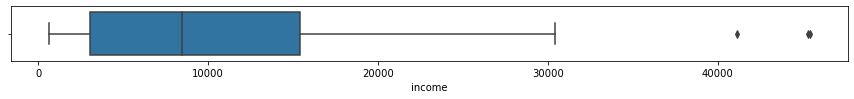

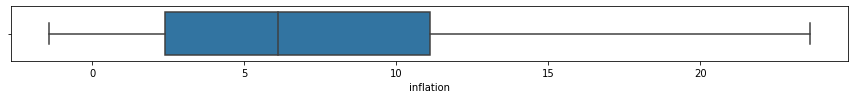

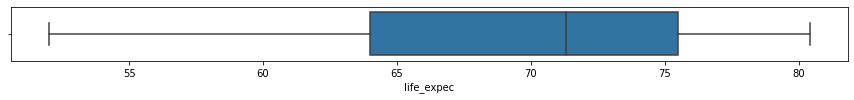

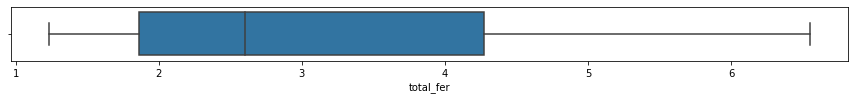

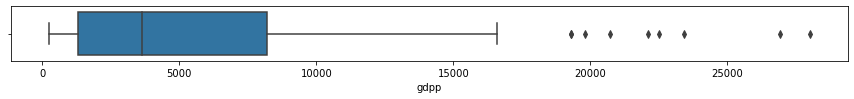

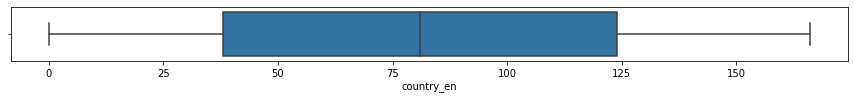

In [130]:
for column in df1:
        plt.figure(figsize=(15,1))
        sns.boxplot(data=df1, x=column)

In [131]:
#Scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df2=scaler.fit_transform(df1)
df2=pd.DataFrame(df2)

In [132]:
df2

,0,1,2,3,4,5,6,7,8,9
0,1.496140,-1.453476,0.573983,-0.020965,-0.972968,0.319527,-1.823541,1.895626,-0.865741,-1.654251
1,-0.681544,-0.500029,0.107676,0.187261,-0.077438,-0.489241,0.948678,-0.954703,-0.286957,-1.633835
2,-0.364952,0.050851,-0.969809,-0.780709,0.242240,1.407687,0.976263,-0.107123,-0.226411,-1.613418
3,2.348278,1.316816,-1.567406,-0.133519,-0.511211,2.437028,-1.285648,2.128027,-0.378593,-1.593001
4,-0.867949,0.426933,-0.127741,0.766918,0.909582,-0.987572,1.017639,-0.626608,1.040140,-1.572584
...,...,...,...,...,...,...,...,...,...,...
120,-0.098659,-0.304043,-0.227340,-0.943913,-0.689886,1.473042,-0.085732,-0.483066,-0.730413,1.632855
121,-0.308734,0.485199,-0.480866,0.417998,-0.828736,-0.794775,-0.885676,0.309831,-0.470230,1.653271
122,-0.483304,1.830618,0.238966,1.965624,-0.662977,0.754138,0.507330,-0.749643,-0.741868,1.694105
123,0.493104,-0.394091,-0.512557,-0.611877,-0.664054,2.633093,-0.265030,1.109564,-0.741868,1.714522


In [133]:
df2.shape

(125, 10)

# Clustering using KMeans

1250.0000000000005
877.3849425980795
746.5914102887754
657.0350694818958
606.3726823760012
573.7416309437132
534.7144411583183
509.5414940148041
473.09403107331696
448.32731849821914


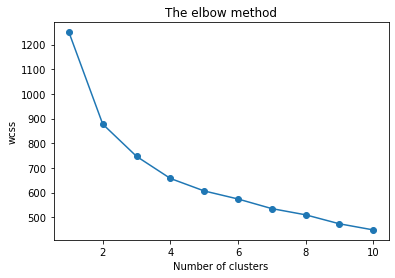

In [134]:
#Finding the optimum number of clusters
#plotting elbow method
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans= KMeans(n_clusters=i, init= 'k-means++', random_state=42)
    kmeans.fit(df2)
    wcss.append(kmeans.inertia_)
    print(kmeans.inertia_)
plt.plot(range(1,11),wcss,'-o')
plt.title("The elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("wcss")
plt.show()

From the above method,optimum number of clusters is 3

In [135]:
model_kmeans=KMeans(n_clusters=3)
model_kmeans.fit(df2)
cluster=model_kmeans.predict(df2)
cluster

array([2, 1, 1, 2, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 2, 1, 1, 1, 2, 1, 0, 2,
       2, 1, 2, 1, 0, 1, 1, 2, 2, 2, 1, 2, 0, 0, 1, 1, 1, 1, 2, 0, 1, 2,
       2, 1, 2, 0, 1, 1, 2, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 0,
       0, 2, 0, 0, 1, 2, 2, 0, 0, 2, 2, 0, 1, 0, 1, 2, 1, 2, 1, 0, 2, 0,
       1, 1, 1, 0, 0, 1, 1, 2, 1, 0, 2, 1, 0, 0, 2, 2, 0, 1, 1, 2, 1, 2,
       2, 0, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2], dtype=int32)

In [136]:
df2['cluster']=cluster
df_n=df2['cluster']
df_n=pd.DataFrame(df_n)
df_n['country']=df['country']
df['cluster']=df_n['cluster']

In [137]:
df.groupby('cluster').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster,,,,,,,,,
0.0,32.178571,43.272143,7.785000,50.485714,21179.071429,4.454750,71.571429,2.448571,18477.535714
1.0,46.394828,39.093103,6.113793,42.710345,15433.051724,9.289707,69.896552,3.274138,11207.275862
2.0,36.451282,41.507154,6.805897,50.342715,16832.615385,7.155128,70.466667,2.808974,11778.871795


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


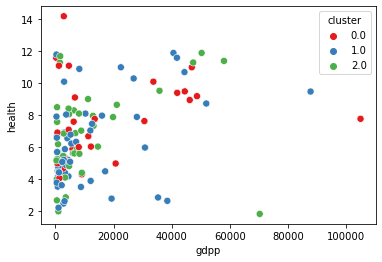

In [138]:
scat = sns.scatterplot("gdpp","health",s=50,data=df,hue="cluster",palette="Set1")

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


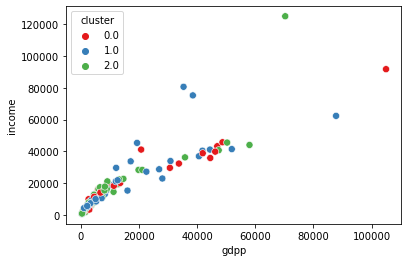

In [139]:
scat = sns.scatterplot("gdpp","income",s=50,data=df,hue="cluster",palette="Set1")

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


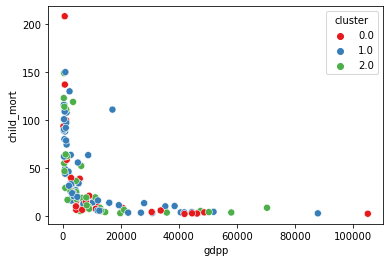

In [143]:
scat = sns.scatterplot("gdpp","child_mort",s=50,data=df,hue="cluster",palette="Set1")

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


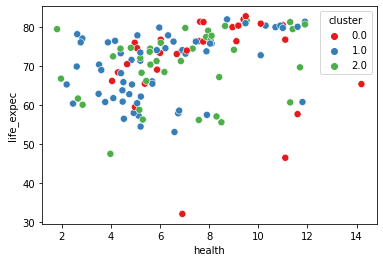

In [145]:
scat = sns.scatterplot("health","life_expec",s=50,data=df,hue="cluster",palette="Set1")

In [114]:
df_n['cluster'].value_counts()

0    60
2    37
1    28
Name: cluster, dtype: int64

In [115]:
cluster0=list(df[df['cluster']==0].country)
cluster0

['Albania',
 'Algeria',
 'Argentina',
 'Armenia',
 'Australia',
 'Bahamas',
 'Bangladesh',
 'Barbados',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Brunei',
 'Burkina Faso',
 'Cambodia',
 'Cameroon',
 'Chad',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Costa Rica',
 'Cyprus',
 'Czech Republic',
 'Dominican Republic',
 'El Salvador',
 'Equatorial Guinea',
 'Fiji',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Guinea',
 'Indonesia',
 'Jordan',
 'Kenya',
 'Kuwait',
 'Lao',
 'Liberia',
 'Libya',
 'Lithuania',
 'Madagascar',
 'Malawi',
 'Maldives',
 'Mauritania',
 'Morocco',
 'Mozambique',
 'Namibia',
 'Nigeria',
 'Norway',
 'Oman',
 'Pakistan',
 'Paraguay',
 'Peru',
 'Philippines',
 'Poland',
 'Portugal']